In [360]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path = os.getcwd()

#Load the Churn_Modeling data set
df = pd.read_csv('Dataset/HousePrices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [361]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [362]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [363]:
plt.style.use('_mpl-gallery')
x = df['condition']
y = df['price']

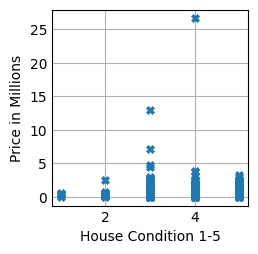

In [364]:
#plot
fig, ax = plt.subplots()
ax.plot(x, y/1E6, 'X', markeredgewidth=0.5)
ax.set_ylabel("Price in Millions")
ax.set_xlabel("House Condition 1-5")
plt.show()

In [365]:
from sklearn.preprocessing import OneHotEncoder
dropper = ['date', 'country', 'street', 'yr_built', 'sqft_above']
df_copy = df.drop(dropper, axis=1)
ohe = OneHotEncoder(drop=None, sparse_output=False)
city_ohe = ohe.fit_transform(df_copy[['city']])

city_df = pd.DataFrame(city_ohe, columns=ohe.get_feature_names_out(['city']), index=df_copy.index)

df_city_ohe = pd.concat([df_copy.drop('city', axis=1), city_df], axis=1)
df_city_ohe.head() 


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,280,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [366]:
df_city_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     4600 non-null   float64
 1   bedrooms                  4600 non-null   float64
 2   bathrooms                 4600 non-null   float64
 3   sqft_living               4600 non-null   int64  
 4   sqft_lot                  4600 non-null   int64  
 5   floors                    4600 non-null   float64
 6   waterfront                4600 non-null   int64  
 7   view                      4600 non-null   int64  
 8   condition                 4600 non-null   int64  
 9   sqft_basement             4600 non-null   int64  
 10  yr_renovated              4600 non-null   int64  
 11  statezip                  4600 non-null   object 
 12  city_Algona               4600 non-null   float64
 13  city_Auburn               4600 non-null   float64
 14  city_Bea

In [367]:
statezip_ohe = ohe.fit_transform(df_city_ohe[['statezip']])

statezip_df = pd.DataFrame(statezip_ohe, columns=ohe.get_feature_names_out(['statezip']), index=df_city_ohe.index)

df_statezip_ohe = pd.concat([df_city_ohe.drop('statezip', axis=1), statezip_df], axis=1)
df_statezip_ohe.head() 


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [368]:
df_statezip_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 132 entries, price to statezip_WA 98354
dtypes: float64(125), int64(7)
memory usage: 4.6 MB


In [369]:
from sklearn.model_selection import train_test_split
Y = df_statezip_ohe['price']
X = df_statezip_ohe.drop('price', axis=1)
Y,X


(0       3.130000e+05
 1       2.384000e+06
 2       3.420000e+05
 3       4.200000e+05
 4       5.500000e+05
             ...     
 4595    3.081667e+05
 4596    5.343333e+05
 4597    4.169042e+05
 4598    2.034000e+05
 4599    2.206000e+05
 Name: price, Length: 4600, dtype: float64,
       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
 0          3.0       1.50         1340      7912     1.5           0     0   
 1          5.0       2.50         3650      9050     2.0           0     4   
 2          3.0       2.00         1930     11947     1.0           0     0   
 3          3.0       2.25         2000      8030     1.0           0     0   
 4          4.0       2.50         1940     10500     1.0           0     0   
 ...        ...        ...          ...       ...     ...         ...   ...   
 4595       3.0       1.75         1510      6360     1.0           0     0   
 4596       3.0       2.50         1460      7573     2.0           0     0   
 45

In [370]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3680, 131), (920, 131), (3680,), (920,))

In [371]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [372]:
y_predicted = model.predict(X_test)
y_predicted

array([ 361837.77950289,  446919.76603212,   53695.4479707 ,
        629620.44166525, 1039727.50711735,  193081.89710492,
        510360.58156882,  478470.12526495,  283091.99935538,
       1112309.41591795,  457256.23283189,  534700.72613845,
       1030189.98753092,  582622.59799339,  399657.49058886,
        249448.17892751,  528521.83461027,  817194.68384896,
       1071388.78048067,  196495.60365308,  445284.45470466,
        812039.12841808,  381205.4329268 ,  265717.08925305,
        591503.13440681,  407935.37894612,  546766.17394648,
        614690.28655547,  141041.36903846,  515839.82033204,
        770066.41736248,  512180.16900877,  782102.65412952,
        613617.03361522,  532304.31747008,  519144.88815594,
        296898.49777448,  256984.68225883,  489377.0814767 ,
        670279.32185953,  734968.80181447,  350552.15112565,
        551991.76797997,  867023.46271674,  674636.04154551,
       1008066.04413033,  451771.02374095, 1089299.82194458,
        875473.46627334,

In [373]:
mse = mean_squared_error(Y_test, y_predicted)
r2 = r2_score(Y_test, y_predicted)

mse, r2

(40408626623.37731, 0.7268735562532052)

In [ ]:
# 0.7268735562532052